In [1]:
from numpy import cos, sin, abs

# True Absolute Error


The difference between the true answer and an approximate answer is called the True Absolute Error:

$E_t = |True - Approx| $

Only really useful when the *true* value is known.

#### Example: What is the derivative of $sin(x)$ at $x=0$?


Recall: $\frac{d sin (x)}{dx} = lim_{\Delta x->0} \frac{sin(x+\Delta x)-sin(x)}{\Delta x}$

True: $\frac{d sin (x)}{dx} = cos(x)$

In [2]:
value_true = cos(0)
print(value_true) 

1.0


Define a function (for later use) approx which takes a parameter, $\Delta x$:

$approx(\Delta x) = \frac{sin(x+\Delta x)-sin(x)}{\Delta x}$  

In [3]:
def approx(delta_x):
    return (sin(0+delta_x)-sin(0))/delta_x

For  $\Delta x = .1$,

In [4]:
value_approx = approx(delta_x = .1)
print(value_approx)

0.9983341664682815


The true absolute error is therefore,

In [5]:
E_t = abs(value_true - value_approx)
print(E_t)

0.0016658335317184525




---


#True relative error

Often the absolute error is not so useful since it doesn't consider the magnitude of the value.

E.g. GPS has an error of about ~1m. Is that important for calculating distance for a long road trip? What about a self-driving the car?

Also note that absolute error has units which complicates generalization.

The true relative error is defined as,

$\epsilon_t = \frac{E_t}{True}$

or as a percent,

$\frac{E_t}{True} \times 100 \%$

#### Example: What is the relative error from the previous calculation?

In [6]:
eps_t = E_t/value_true
print(eps_t)

0.0016658335317184525




---


#Approximate absolute and relative error

What if we don't have the true value?

Numerical methods typically have a tunable parameter that controls accuracy (viz. $\Delta x$ above). We can estimate the error for sequential approximations, using the *better* approximation in place of the *True* one.

$E_a = |Better\ approx - approx|$

$\epsilon_a = \frac{E_a}{Better\ approx}$

#### Example: Use smaller step sizes to find the approximate error and fracitonal error.


In [7]:
E_a = abs(approx(.01) - approx(.1))
print(E_a)

0.0016491669483849059


In [8]:
epsilon_a = E_a/approx(.01)
print(epsilon_a)

0.001649194434821387




---

#Tolerance

Since we don't know the true answer, we can never say that we have reached it. What we can say is that the answer *isn't getting any better*.

Programmatically, we say that the error / fractional error has crossed a *tolerance*.

Define:

The absolute tolerance, $Tol_a$, is the threshold past which the absolute error is *small enough*.

The relative tolerance, $Tol_r$, is the threshold past which the relative error is *small enough*.


##Pseudo code concept

```
Run an algorithm for a given parameter
loop:
  reduce parameter
  run algorithm
  Calculate error and relative error
  Exit when tolerance is met
```





#Lets explore $E_a$ and $\epsilon_a$ as a function of $\Delta x$:

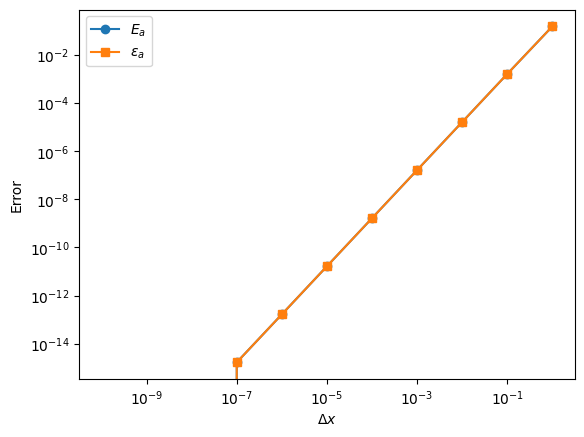

In [9]:
# prompt: Plot E_a and epsilon_a vs delta_x for decending values of delta_x to 1e-10 on a log-log with markers

import matplotlib.pyplot as plt
import numpy as np

delta_x = np.logspace(0,-10,11)
E_a = np.zeros(delta_x.size)
epsilon_a = np.zeros(delta_x.size)

for i, dx in enumerate(delta_x):
  E_a[i] = approx(dx/10) - approx(dx)
  epsilon_a[i] = E_a[i]/approx(dx/10)

plt.loglog(delta_x, E_a, marker='o', label='$E_a$')
plt.loglog(delta_x, epsilon_a, marker='s', label='$\epsilon_a$')
plt.xlabel('$\Delta x$')
plt.ylabel('Error')
plt.legend()
plt.show()


Note:


*   The two errors overlap. Why?
*   The plot is a straight line. What does this mean?
*   There is a precipitous drop-off at $10^{-7}$. What is that?

THESE QUESTIONS AND MORE IN THE NEXT EXCITING EPISODE OF NUMERICAL METHODS FOR ENGINEERING!